<a href="https://colab.research.google.com/github/nissi00/machine-learning/blob/main/agglokmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Categorical variables in the dataset: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
All features are now numerical
Elbow Method to determine the number of clusters to be formed:


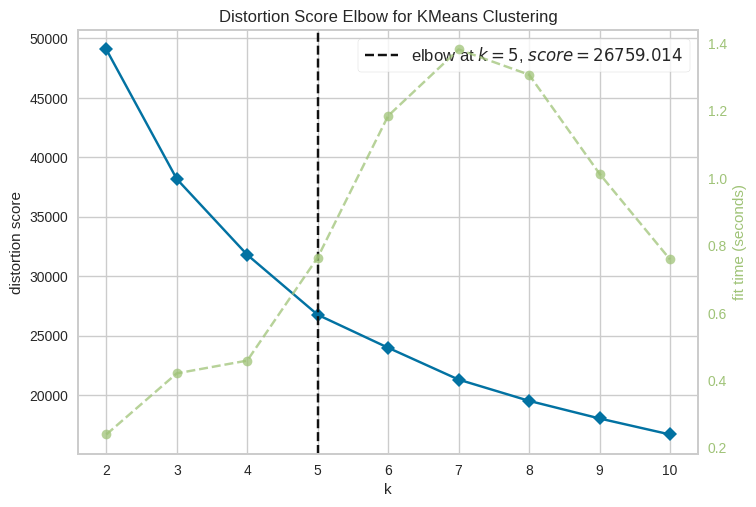

       age  workclass  fnlwgt     education  education-num marital-status  \
7762    18    Private  423024       HS-grad              9  Never-married   
23881   17    Private  178953          12th              8  Never-married   
30507   25  Local-gov  348986       HS-grad              9  Never-married   
28911   20    Private  218215  Some-college             10  Never-married   
19484   47    Private  244025       HS-grad              9  Never-married   

              occupation    relationship                race     sex  \
7762       Other-service   Not-in-family               White    Male   
23881              Sales       Own-child               White  Female   
30507  Handlers-cleaners  Other-relative               Black    Male   
28911              Sales       Own-child               White  Female   
19484  Machine-op-inspct       Unmarried  Amer-Indian-Eskimo    Male   

       capital-gain  capital-loss  hours-per-week native-country income  \
7762              0          

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans
import warnings

# Ignorer les avertissements
warnings.simplefilter("ignore")
np.random.seed(42)

# Installation et importation de ucimlrepo
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Récupérer le dataset "adult"
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

# Renommer la colonne cible pour une meilleure compréhension
y = y.rename(columns={y.columns[0]: "income"})

# Concaténer les données et les cibles en un seul DataFrame
data = pd.concat([X, y], axis=1)
data["income"] = data["income"].replace({">50K.": ">50K", "<=50K.":"<=50K"})

# Supprimer les lignes avec des valeurs manquantes
for col in ['workclass', 'occupation', 'native-country']:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

# # Afficher le nombre de valeurs manquantes pour vérifier
print(data.isnull().sum())

# Encoder les variables catégorielles
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

# Dictionnaire pour stocker les instances de LabelEncoder pour chaque colonne
encoders = {}
for col in object_cols:
    LE = LabelEncoder()
    data[col] = LE.fit_transform(data[col])
    encoders[col] = LE  # Stocker l'instance de LabelEncoder
ds=data.copy()
# Afficher les premiers résultats pour vérifier
print("All features are now numerical")

# Réduire la taille du dataset pour les tests
data = data.sample(frac=0.3, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
scaled_ds = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# PCA pour réduire à 3 dimensions
pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=["col1", "col2", "col3"])

# Méthode du coude pour déterminer le nombre de clusters
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()



# Clustering avec Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
data["Clusters"] = yhat_AC

# Afficher les premiers résultats
data.head()

# Ajouter les clusters au DataFrame original
data["Clusters"] = yhat_AC

# Décoder toutes les colonnes catégorielles
for col in object_cols:
    data[col] = encoders[col].inverse_transform(data[col])



# Afficher les premiers résultats
print(data.head())


In [ ]:
# Afficher les premiers résultats
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Clusters
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K,1
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,0
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K,1
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K,1
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K,1


In [ ]:
PCA_ds.head()

,col1,col2,col3,Clusters
0,-1.216460,-0.619240,-1.022718,1
1,-2.845768,-0.628931,-1.365434,0
2,-1.348652,-0.201345,0.200775,1
3,-1.893584,1.577714,-1.393141,1
4,-1.158103,0.063944,-0.410627,1


In [ ]:
# # Décoder la variable income
# data['income'] = LE.inverse_transform(data['income'])

# # Afficher les premiers résultats pour vérifier
# print(data[['income']].head())



In [ ]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

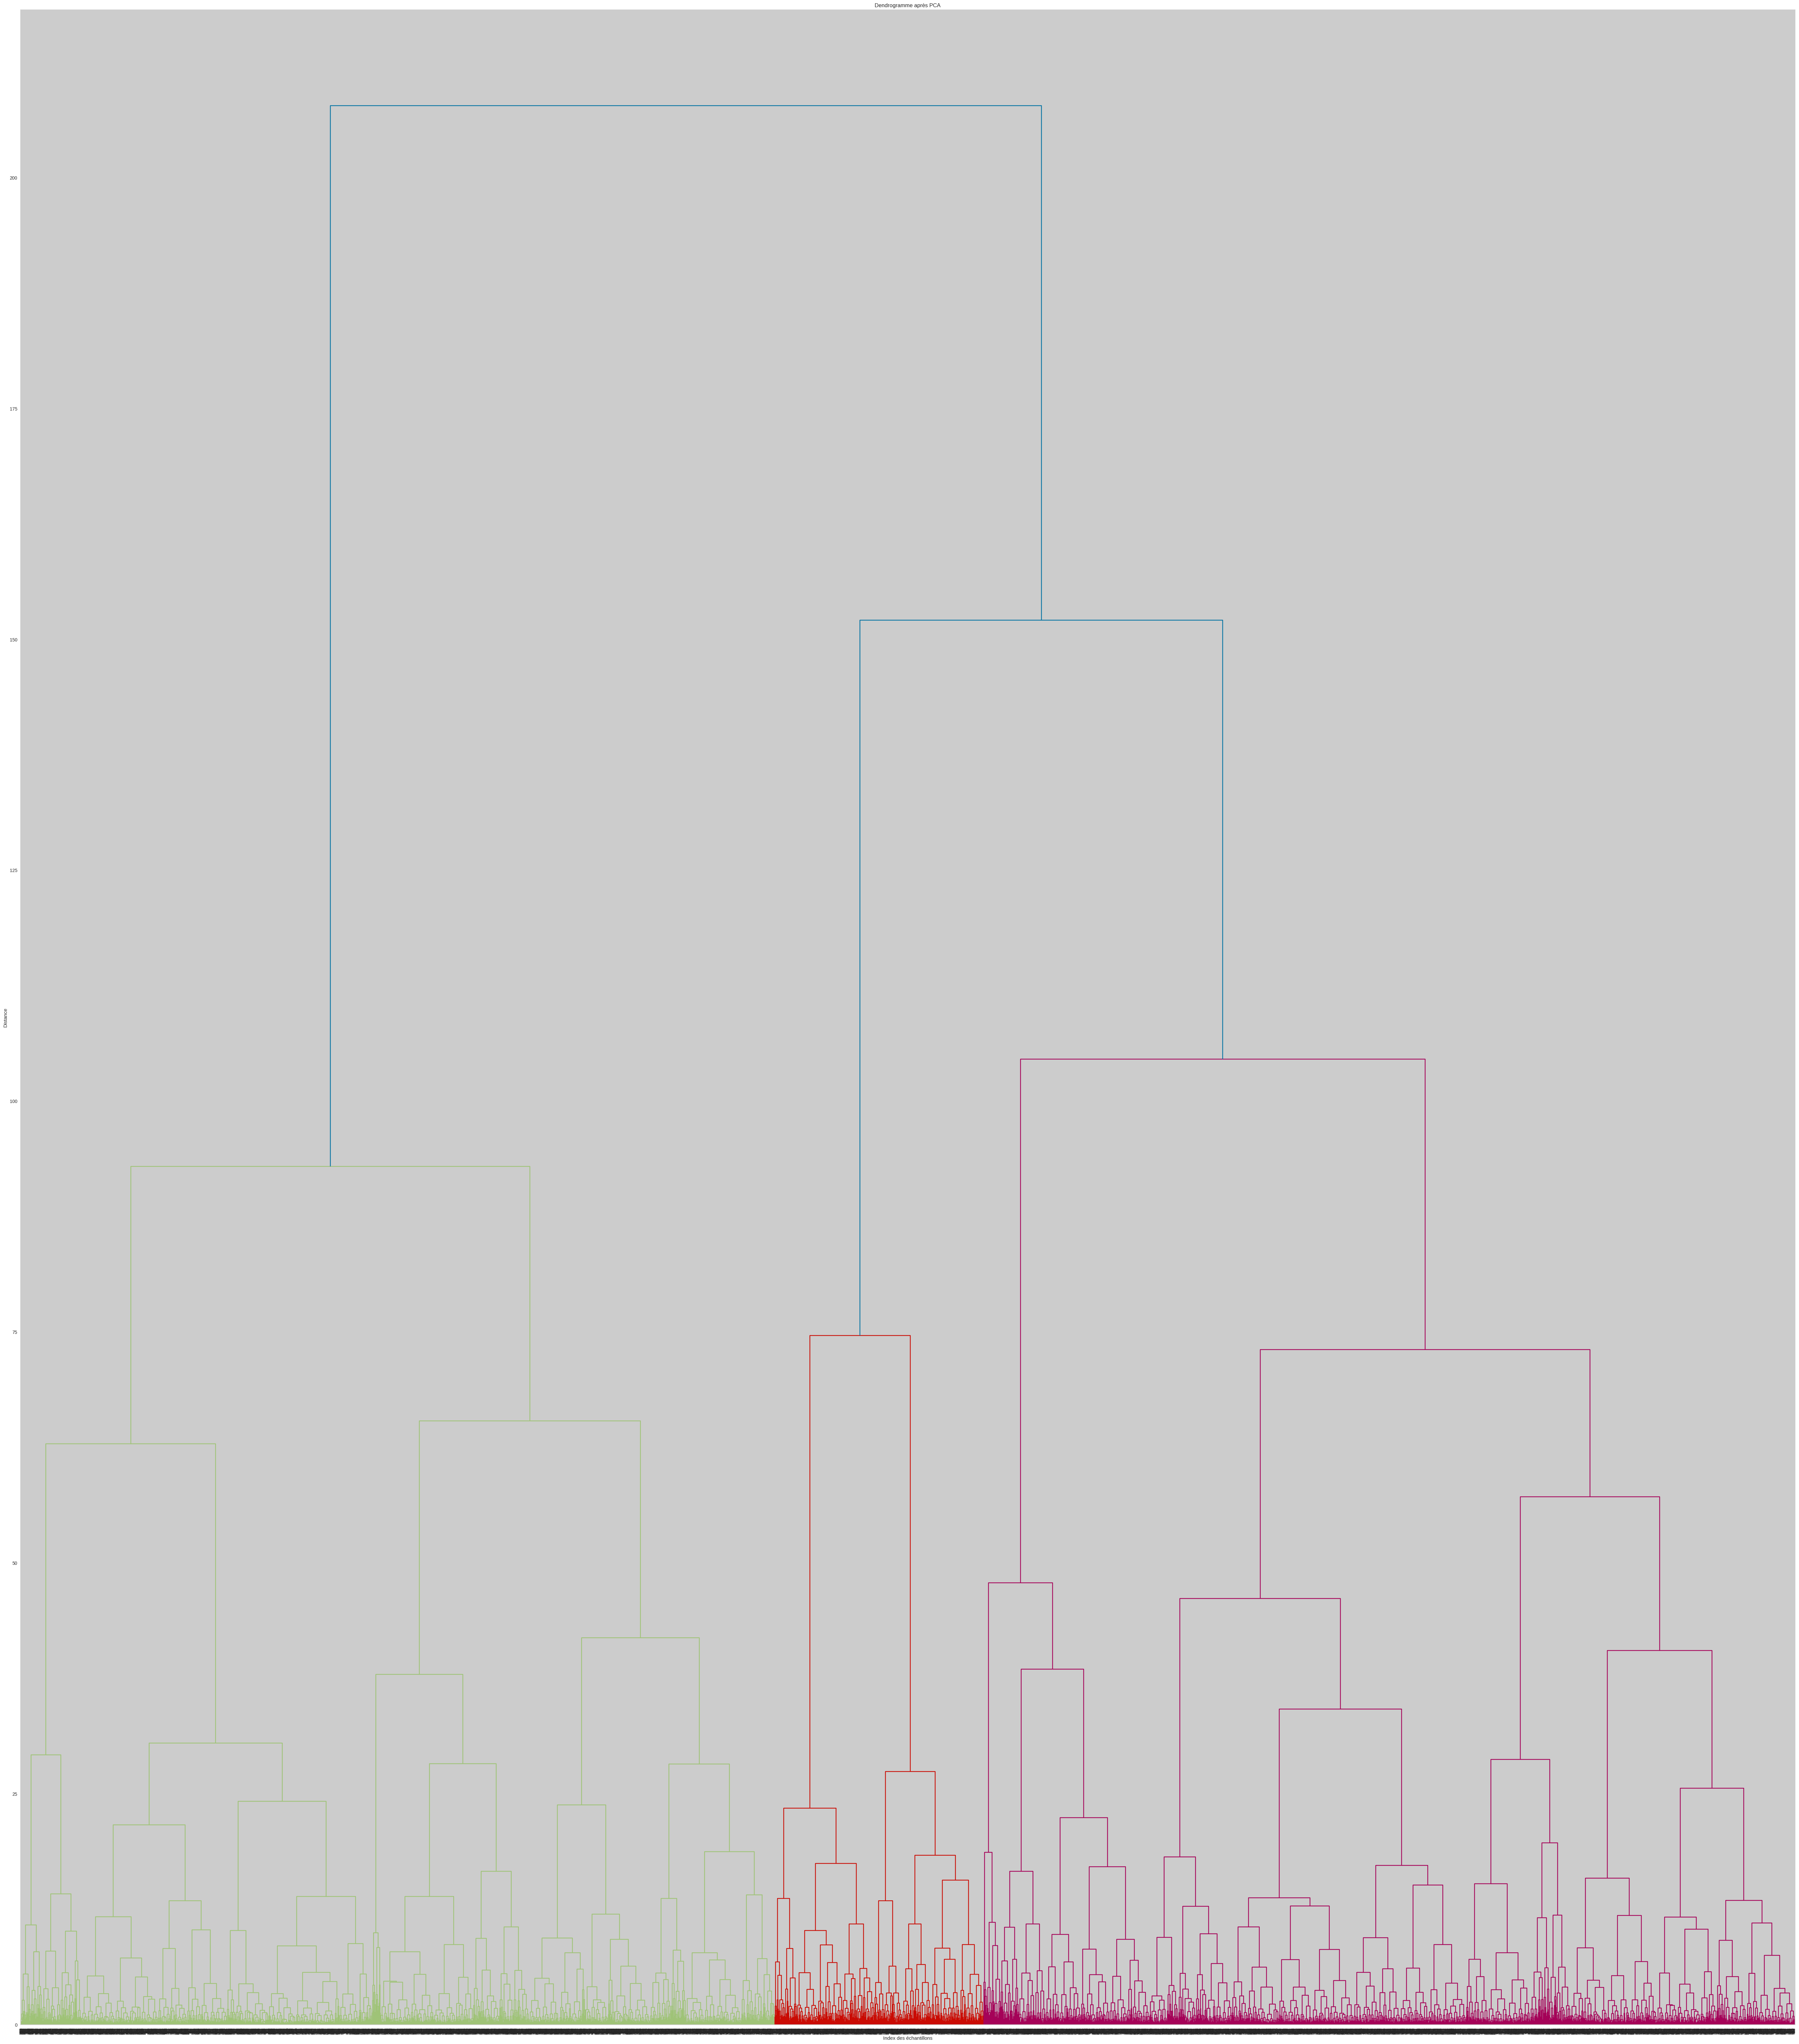

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


# Calculez la matrice de lien
linkage_matrix = linkage(PCA_ds.drop(columns=["Clusters"]), method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(70, 80))
dendrogram(linkage_matrix)
plt.title("Dendrogramme après PCA")
plt.xlabel("Index des échantillons")
plt.ylabel("Distance")
plt.show()


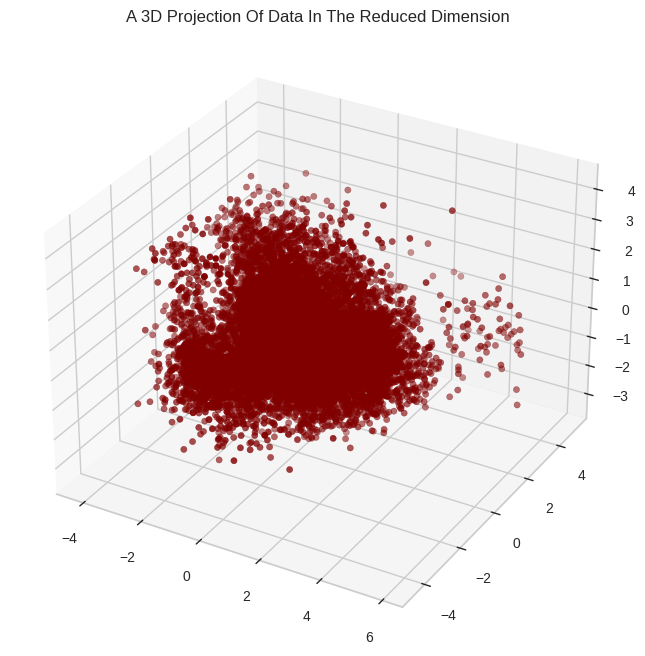

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

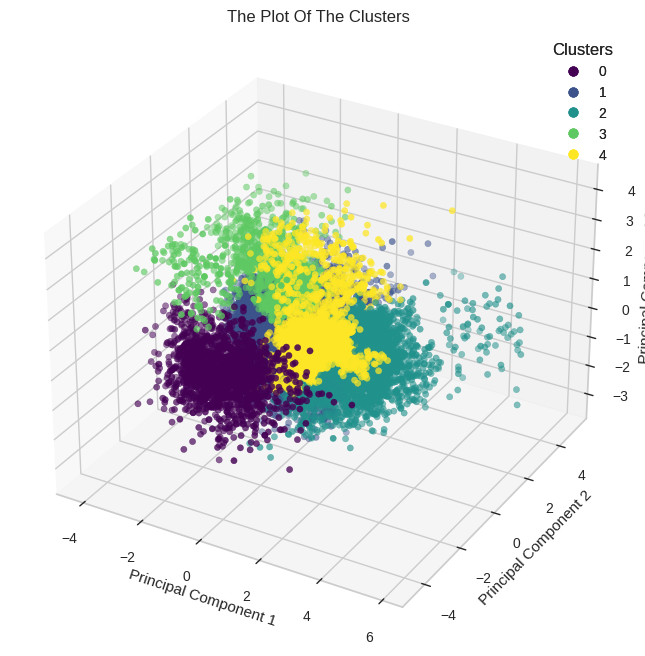

In [ ]:
from matplotlib import cm

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")

ax.set_title("The Plot Of The Clusters")
scatter = ax.scatter(PCA_ds["col1"], PCA_ds["col2"], PCA_ds["col3"], c=PCA_ds["Clusters"], cmap="viridis", marker="o")

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

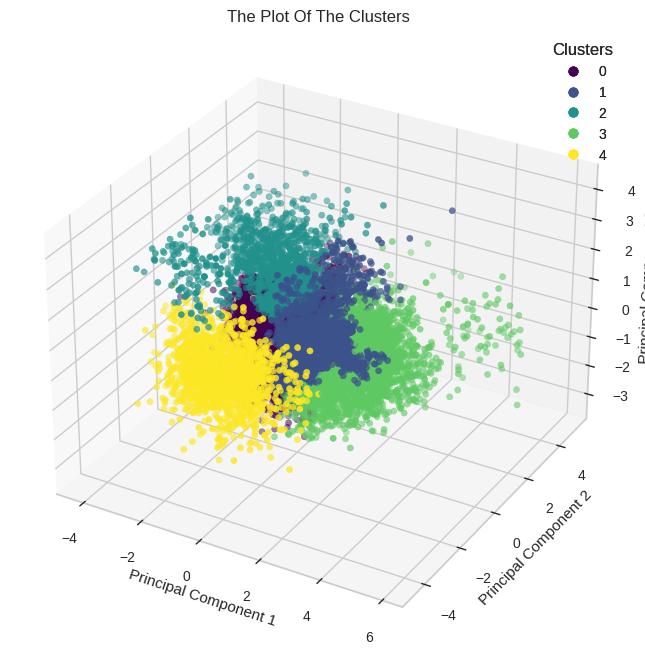

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(PCA_ds)  # Utiliser label_data au lieu de PCA_ds
clusters = kmeans.predict(PCA_ds)
PCA_ds["Clusters_kmean"] = clusters
data["Clusters_kmean"] = clusters


from matplotlib import cm

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")

ax.set_title("The Plot Of The Clusters")
scatter = ax.scatter(PCA_ds["col1"], PCA_ds["col2"], PCA_ds["col3"], c=PCA_ds["Clusters_kmean"], cmap="viridis", marker="o")

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

In [ ]:
# data["income"] = data["income"].replace({">50K.": ">50K", "<=50K.":"<=50K"})


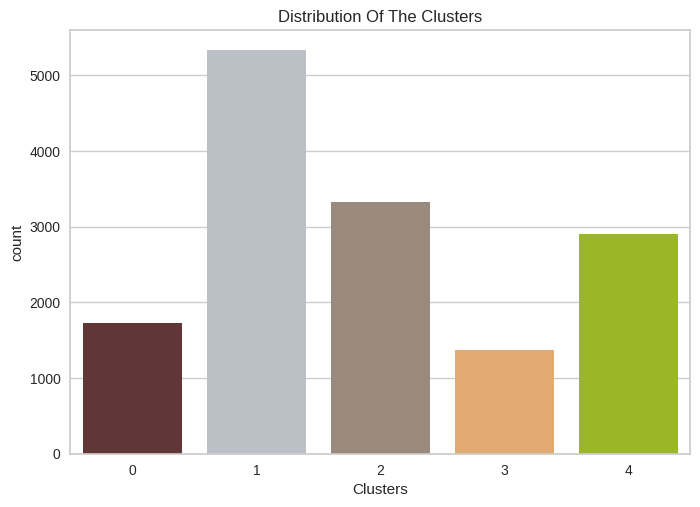

In [ ]:
#Plotting countplot of clusters
import seaborn as sns

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#A9CF10"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
data["income"].count()

14653

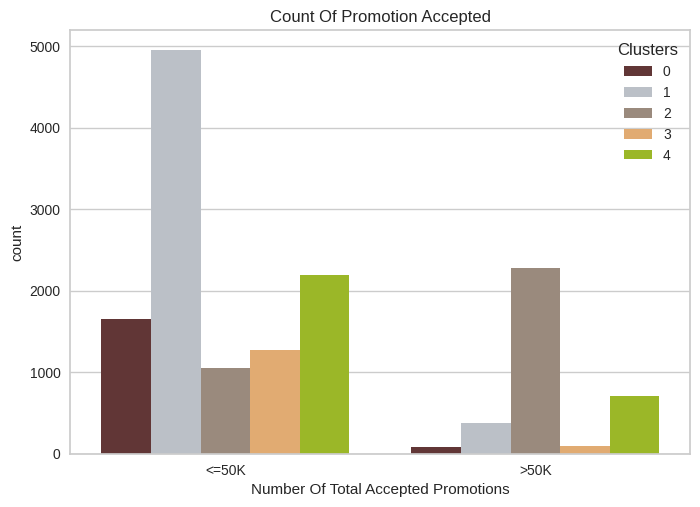

In [ ]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["income"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

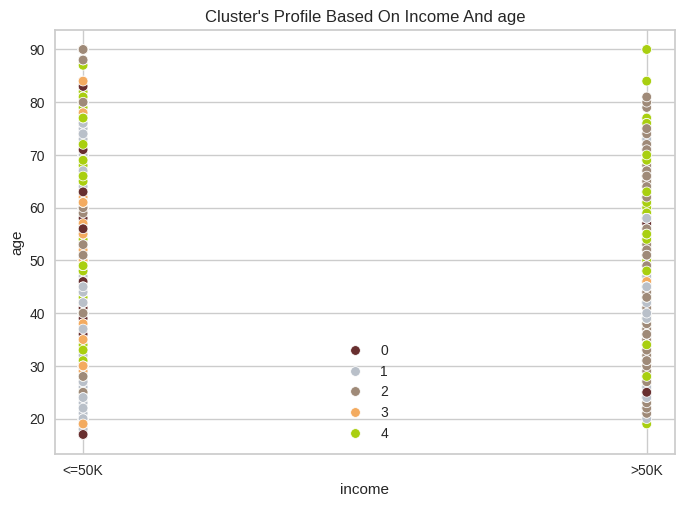

In [ ]:
pl = sns.scatterplot(data = data,y=data["age"], x=data["income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And age")
plt.legend()
plt.show()

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Clusters,Clusters_kmean
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K,1,0
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,0,0
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K,1,0
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K,1,0
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K,1,0


In [ ]:
data["incomeencoder"] = data["income"].replace({">50K.": 1, "<=50K.":0,"<=50K":0,">50K":1})
ds["incomeencoder"]=data["incomeencoder"]


In [ ]:
# plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["income"], color= "#CBEDDD", alpha=0.5 )
# pl=sns.boxenplot(x=data["Clusters"], y=data["income"], palette=pal)
# plt.show()

In [ ]:
data["incomeencoder"].unique()

array([0, 1])

<Figure size 800x550 with 0 Axes>

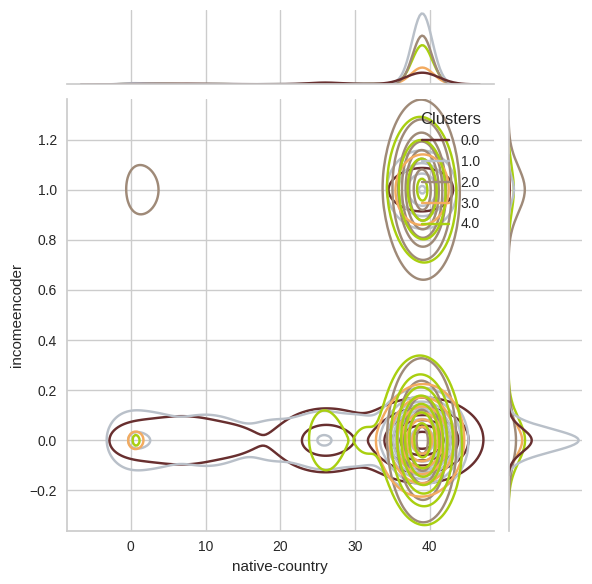

<Figure size 800x550 with 0 Axes>

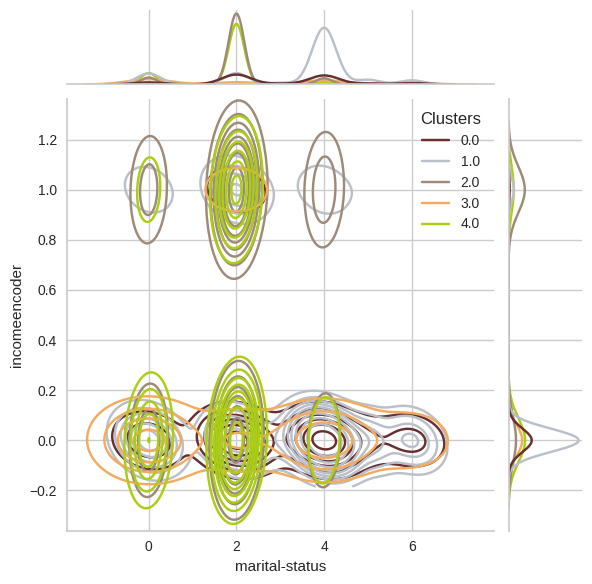

<Figure size 800x550 with 0 Axes>

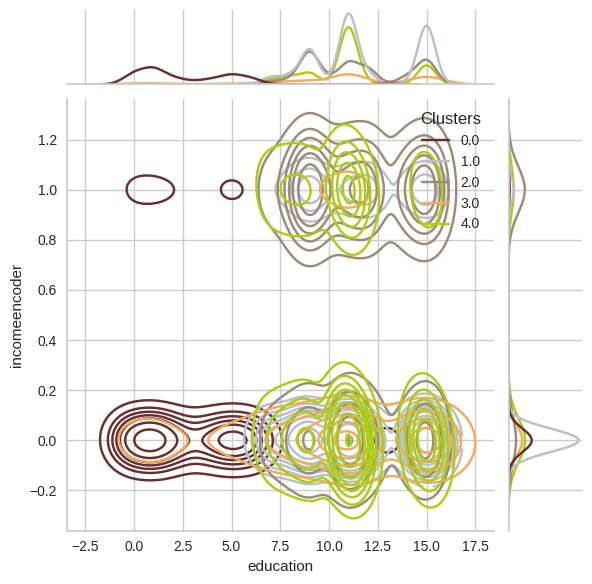

<Figure size 800x550 with 0 Axes>

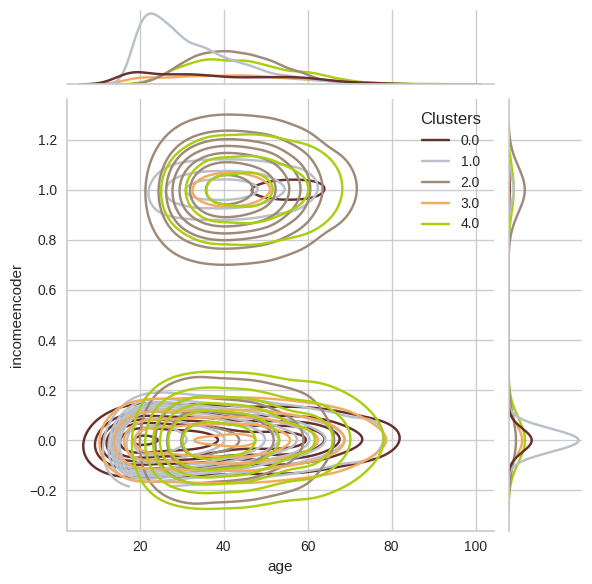

<Figure size 800x550 with 0 Axes>

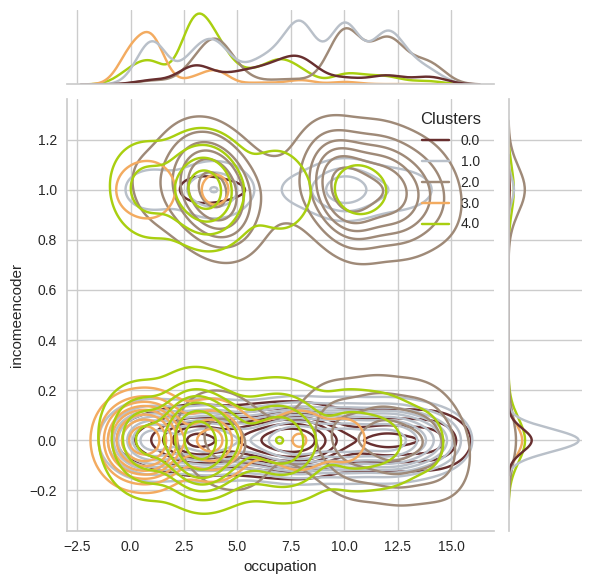

In [ ]:
Personal = [ "native-country","marital-status","education", "age", "occupation"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=ds[i], y=ds["incomeencoder"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

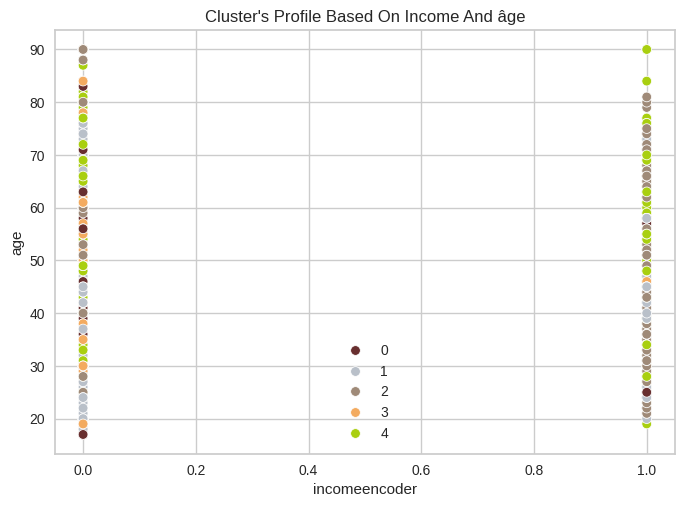

In [ ]:
pl = sns.scatterplot(data = data,y=data["age"], x=data["incomeencoder"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And âge")
plt.legend()
plt.show()